In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

### RFM
- Recency (구매 시점) : 얼마나 최근에 구매
- Frequency (구매빈도, 수량) : 얼마나 자주 구매
- Monetary (구매금액) : 얼마나 많이 구매

In [4]:
raw = pd.read_parquet('my_data.parquet')
raw.shape

(541909, 8)

In [5]:
raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
raw['InvoiceNo'] = raw['InvoiceNo'].astype('category')
raw['StockCode'] = raw['StockCode'].astype('category')
raw['Description'] = raw['Description'].astype('category')
raw['Quantity'] = raw['Quantity'].astype('int32')
raw['InvoiceDate'] = raw['InvoiceDate'].astype('category')
raw['UnitPrice'] = raw['UnitPrice'].astype('float64')
raw['CustomerID'] = raw['CustomerID'].astype('float32')
raw['Country'] = raw['Country'].astype('category')

In [11]:
raw_valid = raw[raw['CustomerID'].notnull() &
(raw['Quantity'] > 0) &
(raw['UnitPrice'] > 0)].copy()
raw_valid.shape

(397884, 8)

### MonetaryValue

In [12]:
raw_valid['TotalPrice'] = raw_valid['Quantity'] * raw_valid['UnitPrice']
raw_valid.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
raw_valid.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.421875,22.397000
std,179.331775,22.097877,1713.141602,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


### 이상치 제거

In [14]:
raw_valid = raw_valid[raw_valid["TotalPrice"] < 160000].copy()
raw_valid.shape

(397883, 9)

### 중복 데이터 제거

In [19]:
raw_valid[raw_valid.duplicated(keep=False)].sort_values(["InvoiceNo", "StockCode"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10
...,...,...,...,...,...,...,...,...,...
541655,581538,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,2011-12-09 11:34:00,1.25,14446.0,United Kingdom,1.25
541656,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49
541666,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-12-09 11:34:00,2.08,14446.0,United Kingdom,2.08


In [21]:
df = raw_valid.drop_duplicates().copy()
df.shape
# 완전히 똑같은 것만.

(392691, 9)

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].head(1)

0   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [23]:
last_timestamp = df['InvoiceDate'].max() + dt.timedelta(days = 1)
last_timestamp

Timestamp('2011-12-10 12:50:00')

### 고객별 RFM

In [25]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (last_timestamp - x.max()).days,
                              'InvoiceNo' : 'count',
                              'TotalPrice' : 'sum'
                             })

In [28]:
rfm = rfm.rename(columns={"InvoiceDate" : "Recency",
                          'InvoiceNo' : 'Frequency',
                          'TotalPrice' : 'MonetaryValue'})
rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [29]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


<Axes: >

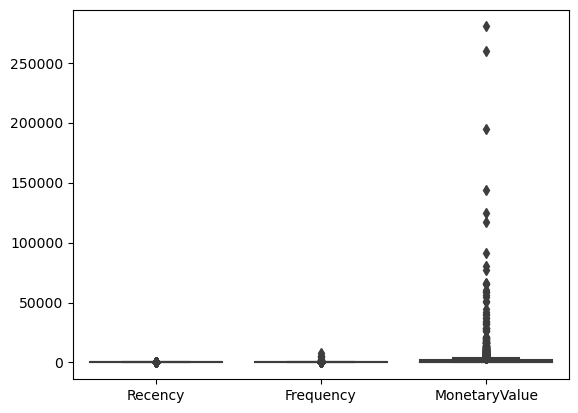

In [33]:
sns.boxplot(rfm)

array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'MonetaryValue'}>, <Axes: >]],
      dtype=object)

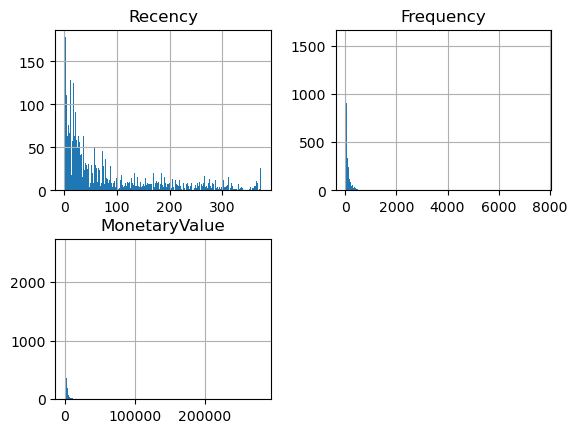

In [31]:
rfm.hist(bins=300)

### RFM 모형
- SCORING 기법 : bins 나누 듯이 5개로 나누기

In [39]:
r_labels = list(range(5,0, -1))
f_labels = list(range(1,6))
m_labels = list(range(1,6))

cut_size = 5

In [46]:
r_qcut = pd.qcut(x=rfm['Recency'], q=cut_size, labels=r_labels)
r_qcut.value_counts()

f_qcut = pd.qcut(x=rfm['Frequency'], q=cut_size, labels=f_labels)
f_qcut.value_counts()

m_qcut = pd.qcut(x=rfm['MonetaryValue'], q=cut_size, labels=m_labels)
m_qcut.value_counts()
# qcut은 상대평가 등급별 같은 개수가 들어감, cut 과 반대

MonetaryValue
1    868
3    868
5    868
2    867
4    867
Name: count, dtype: int64

In [47]:
rfm = rfm.assign(R=r_qcut, F=f_qcut, M=m_qcut)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


### RFM Segment

In [49]:
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,19,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122


In [50]:
rfm['RFM_score'] = rfm[['R', 'F', 'M']].astype(int).sum(axis=1)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,182,4310.00,5,5,5,555,15
12348.0,75,31,1797.24,2,3,4,234,9
12349.0,19,73,1757.55,4,4,4,444,12
12350.0,310,17,334.40,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,12,178.05,5,1,1,511,7


,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,182,4310.00,5,5,5,555,15
12348.0,75,31,1797.24,2,3,4,234,9
12349.0,19,73,1757.55,4,4,4,444,12
12350.0,310,17,334.40,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,12,178.05,5,1,1,511,7


<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

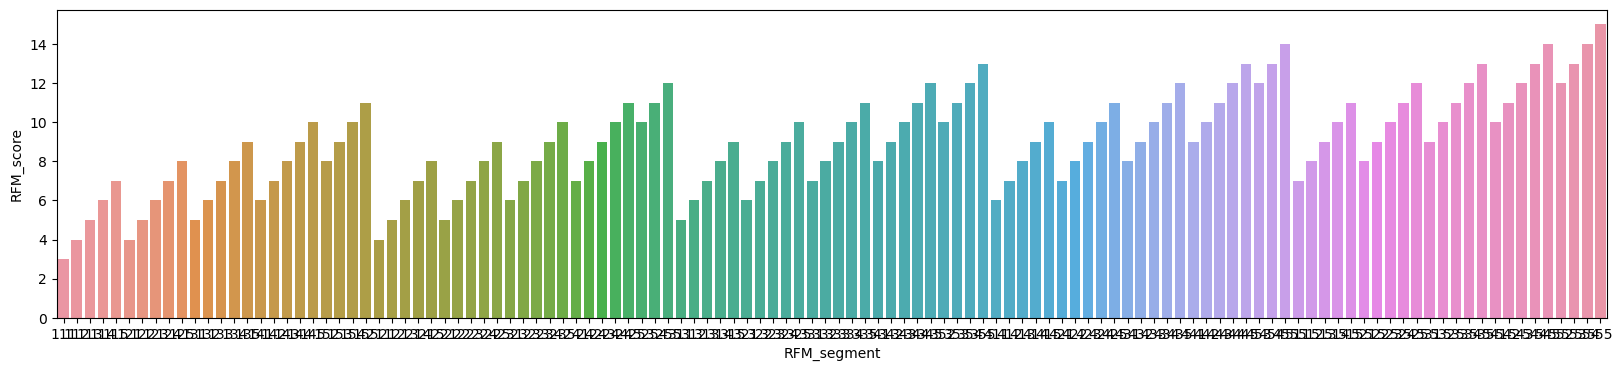

In [56]:
plt.figure(figsize=(20,4))
sns.barplot(data=rfm.sort_values('RFM_segment'), x='RFM_segment', y='RFM_score')

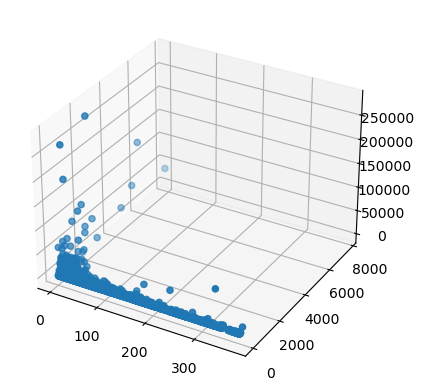

In [58]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['Recency'], rfm['Frequency'], rfm['MonetaryValue'])

array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>,
        <Axes: title={'center': 'MonetaryValue'}>],
       [<Axes: title={'center': 'R'}>, <Axes: title={'center': 'F'}>,
        <Axes: title={'center': 'M'}>],
       [<Axes: title={'center': 'RFM_segment'}>,
        <Axes: title={'center': 'RFM_score'}>, <Axes: >]], dtype=object)

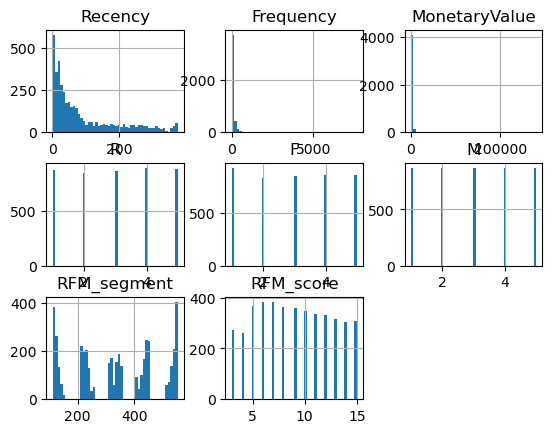

In [62]:
rfm.astype(int).hist(bins=50)

In [68]:
rfm.groupby("RFM_score").agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue':['mean', 'sum']
                             }).style.background_gradient().format("{:,.0f}")

In [73]:
# 3단계
rfm['RFM_class'] = pd.qcut(x=rfm['RFM_score'], q=3, labels=['silver', 'gold', 'platinum'])
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver
18281.0,181,7,80.82,1,1,1,111,3,silver
18282.0,8,12,178.05,5,1,1,511,7,silver


In [74]:
rfm.groupby("RFM_class")['RFM_score'].describe()

C:\Users\hmins\AppData\Local\Temp\ipykernel_16896\2881352182.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby("RFM_class")['RFM_score'].describe()


,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,1668.0,5.209832,1.384324,3.0,4.0,5.0,6.0,7.0
gold,1409.0,9.469127,1.114505,8.0,8.0,9.0,10.0,11.0
platinum,1261.0,13.471055,1.124120,12.0,12.0,13.0,14.0,15.0


C:\Users\hmins\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='RFM_class', ylabel='RFM_score'>

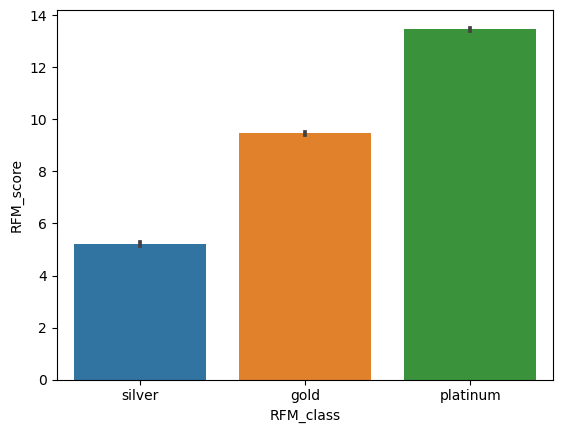

In [75]:
sns.barplot(data=rfm, x='RFM_class', y='RFM_score')

In [76]:
rfm.groupby('RFM_class').agg({'Recency' : 'mean',
                              'Frequency':'mean',
                              'MonetaryValue' : ['mean','sum','count']})


C:\Users\hmins\AppData\Local\Temp\ipykernel_16896\4256678743.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby('RFM_class').agg({'Recency' : 'mean',


Recency   Frequency MonetaryValue                   
                 mean        mean          mean          sum count
RFM_class                                                         
silver     170.072542   17.068945    411.232339   685935.542  1668
gold        65.855926   55.664301   1005.104153  1416191.752  1409
platinum    19.949247  226.636796   5247.114988  6616612.000  1261

In [77]:
rfm.groupby('RFM_class').agg({'Recency' : 'mean',
                              'Frequency':'mean',
                              'MonetaryValue' : ['mean','sum','count']
                             }).style.background_gradient().format("{:,.0f}")


C:\Users\hmins\AppData\Local\Temp\ipykernel_16896\2391181544.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby('RFM_class').agg({'Recency' : 'mean',


C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: u

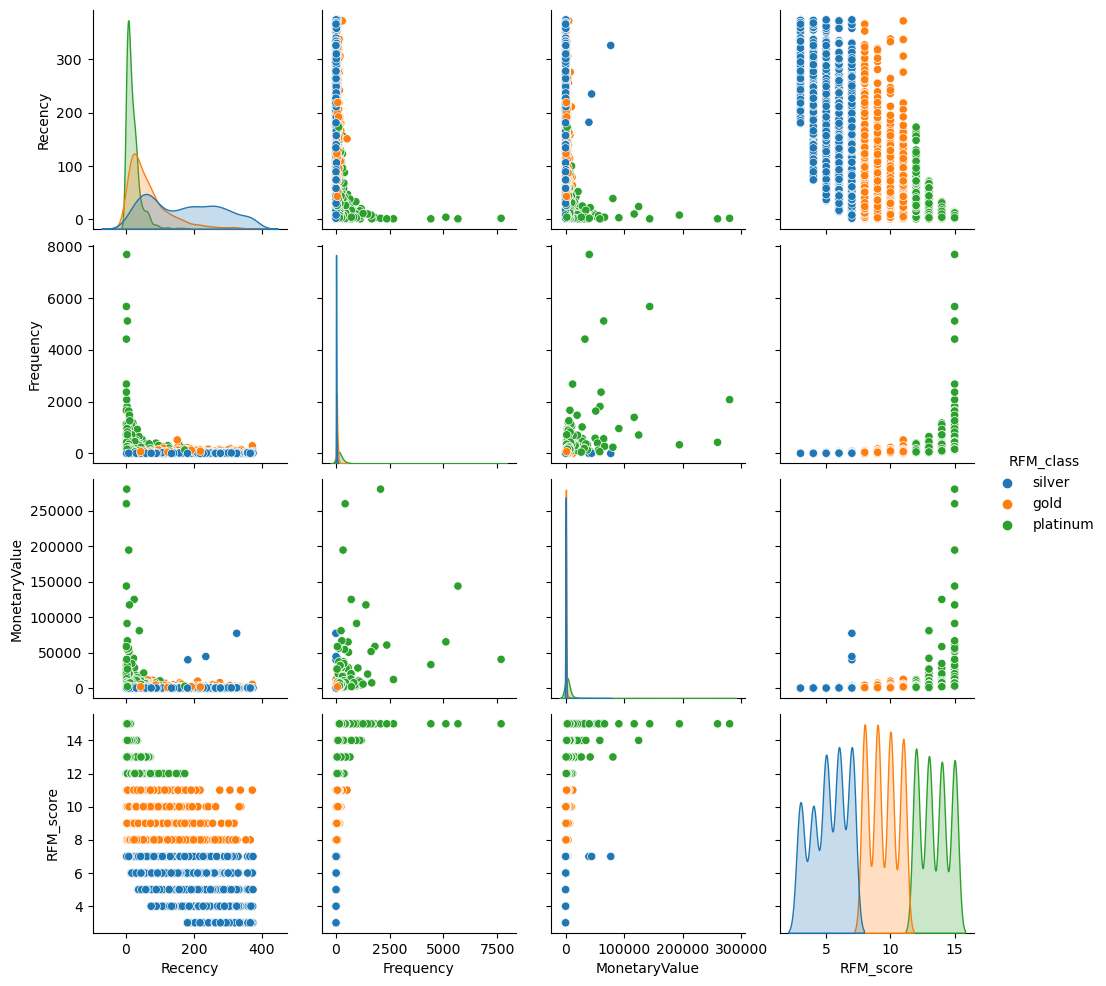

In [80]:
sns.pairplot(data=rfm, hue='RFM_class')

In [83]:
corr = rfm.select_dtypes(include='number').corr()
corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.206618,-0.122937,-0.700621
Frequency,-0.206618,1.000000,0.444920,0.404260
MonetaryValue,-0.122937,0.444920,1.000000,0.250433
RFM_score,-0.700621,0.404260,0.250433,1.000000


In [86]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<Axes: >

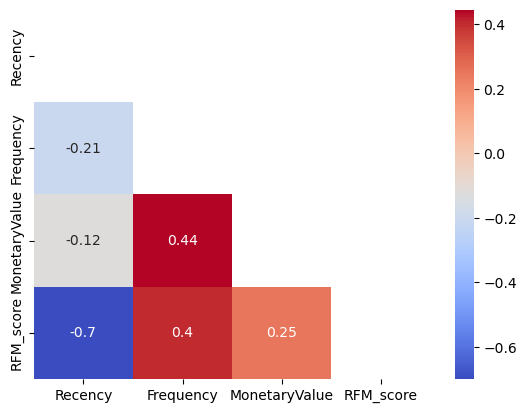

In [87]:
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)

In [89]:
rfm.to_csv('rfm.csv')